Original Discrete Data:
 [ 0  0  0  2  5 14 39 52 83 98 99 80 52 37 20  6  1  0  0  0]

Binary Encoded Data:
 ['0000000', '0000000', '0000000', '0000010', '0000101', '0001110', '0100111', '0110100', '1010011', '1100010', '1100011', '1010000', '0110100', '0100101', '0010100', '0000110', '0000001', '0000000', '0000000', '0000000']

Binary Decoded Data:
 [0, 0, 0, 2, 5, 14, 39, 52, 83, 98, 99, 80, 52, 37, 20, 6, 1, 0, 0, 0]

Data successfully restored: True


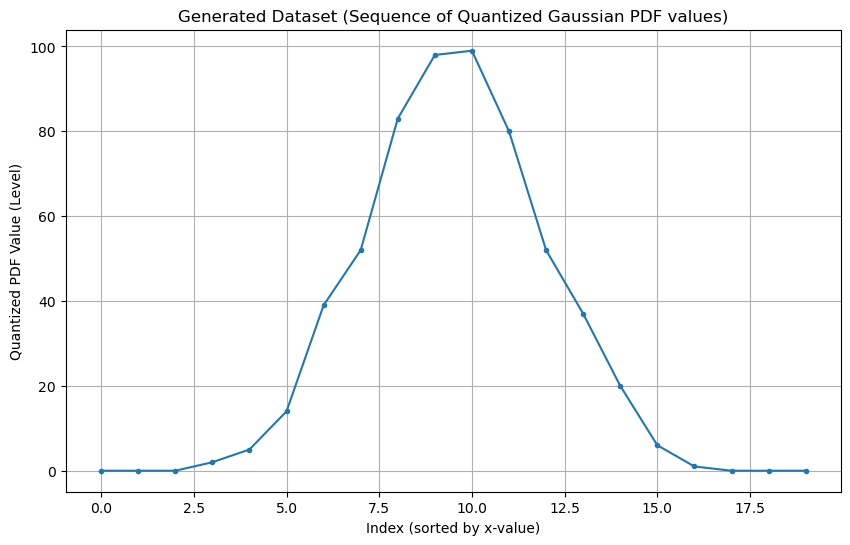

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mu = 0
sigma = 1
num_points = 20
num_levels = 100
x_range = (-4, 4)

x_base = np.linspace(x_range[0], x_range[1], num_points)
jitter = (np.random.rand(num_points) - 0.5) * (x_base[1] - x_base[0]) * 0.5
x_values = np.sort(x_base + jitter)

continuous_dataset = norm.pdf(x_values, loc=mu, scale=sigma)


bins = np.linspace(continuous_dataset.min(), continuous_dataset.max(), num_levels + 1)
discrete_dataset = np.digitize(continuous_dataset, bins) - 1
discrete_dataset[discrete_dataset == num_levels] = num_levels - 1


num_bits = int(np.ceil(np.log2(num_levels)))

encoded_dataset = [format(val, f'0{num_bits}b') for val in discrete_dataset]

decoded_dataset = [int(binary_val, 2) for binary_val in encoded_dataset]


print("Original Discrete Data:\n", discrete_dataset)
print("\nBinary Encoded Data:\n", encoded_dataset)
print("\nBinary Decoded Data:\n", decoded_dataset)

is_restored = np.array_equal(discrete_dataset, decoded_dataset)
print(f"\nData successfully restored: {is_restored}")

plt.figure(figsize=(10, 6))
plt.plot(discrete_dataset, marker='.', linestyle='-')
plt.title("Generated Dataset (Sequence of Quantized Gaussian PDF values)")
plt.xlabel("Index (sorted by x-value)")
plt.ylabel("Quantized PDF Value (Level)")
plt.grid(True)
plt.show()